In [1]:
import pandas as pd
import tensorflow as tf

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

## Generate data using sklearn.datasets.make_circles

In [2]:
X, y = make_circles(1000, noise=0.03, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

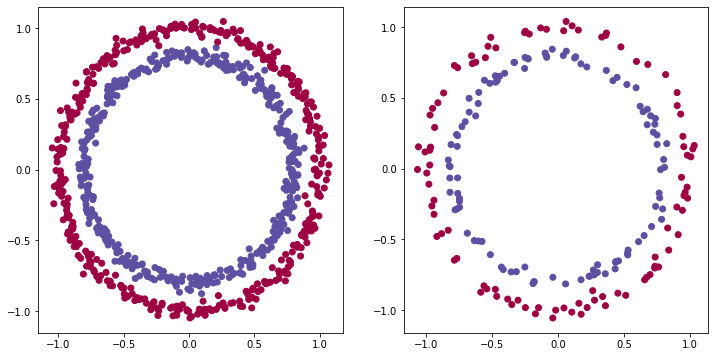

In [3]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:,1], c=y_train, cmap=plt.cm.Spectral)
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:,1], c=y_test, cmap=plt.cm.Spectral);

## Build a simple model

In [4]:
def create_model():
  return tf.keras.Sequential([
      tf.keras.layers.Input(shape=(2,)),
      tf.keras.layers.Dense(10, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid'),
  ])

## Not tuning learning rate

In [5]:
epochs=100

model = create_model()
model.compile(loss='mae', optimizer='adam', metrics=['accuracy'])
history1 = model.fit(X_train, y_train, epochs=epochs, verbose=0)

In [6]:
print(history1.history['loss'][-5:])
print(history1.history['accuracy'][-5:])

[0.42709437012672424, 0.4257967472076416, 0.4247440993785858, 0.42333984375, 0.4221831262111664]
[0.6524999737739563, 0.6537500023841858, 0.6512500047683716, 0.6737499833106995, 0.7074999809265137]


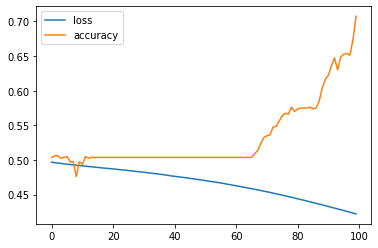

In [7]:
pd.DataFrame(history1.history).plot();

## Declare a LearningRateScheduler callback and use it in model training

In [8]:
def fn_lr(epoch):
  return 1e-4 * 10**(epoch/20)

lrs = tf.keras.callbacks.LearningRateScheduler(fn_lr)

model = create_model()
model.compile(loss='mae', optimizer='adam', metrics=['accuracy'])
history2 = model.fit(X_train, y_train, epochs=epochs, callbacks=[lrs], verbose=0)

In [9]:
learning_rates = fn_lr(tf.range(epochs))

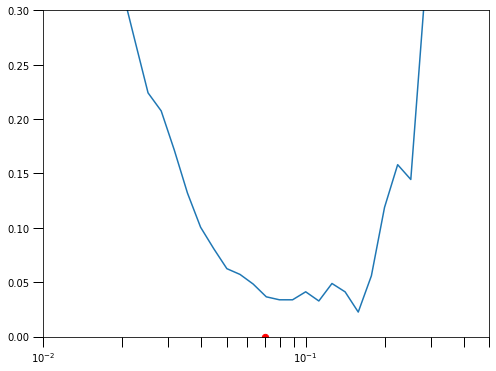

In [12]:
plt.figure(figsize=(8,6))
plt.semilogx(learning_rates, history2.history['loss'])
plt.tick_params('both', length=10, width=1, which='both')

plt.scatter(0.07, 0, s=40, c='r')

plt.axis([1e-2, 0.5, 0, 0.3])
plt.show();

## Training the model again using the picked learning rate

In [13]:
lr = 0.07

model = create_model()
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
model.compile(loss='mae', optimizer=optimizer, metrics=['accuracy'])

history3 = model.fit(X_train, y_train, epochs=epochs, verbose=0)

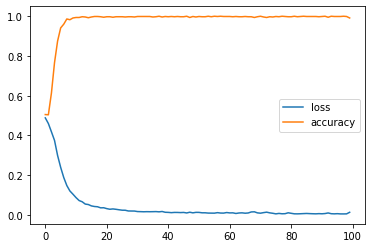

In [14]:
pd.DataFrame(history3.history).plot();

In [15]:
print(history3.history['loss'][-5:])
print(history3.history['accuracy'][-5:])

[0.005869891028851271, 0.004738129209727049, 0.004658944439142942, 0.004921067506074905, 0.012838546186685562]
[0.9987499713897705, 0.9987499713897705, 1.0, 0.9987499713897705, 0.9912499785423279]


The model converges much faster than before.